In [ ]:
"""
Decision Tree Model

For the Bank Marketing dataset available in UCI Machine Learning Repository, induct a decision tree to predict 
whether a client will subscribe to a term deposit or not (given in column 'y'). 

Consider the column 'y' as the target variable. From the remaining columns, consider all except 'duration' as predictors.

Encode the predictors to convert them to numerical data.

Split the data into train and test with a ratio of 80:20.

Build a model using Decision Tree algorithm, to predict the target.

Determine the accuracy, precision and recall for every class in the outcome.

Modify the hyperparameters, and build a new model. Compare the performance of both models.
"""

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
bank_marketing = pd.read_csv("../../datasets/bank-additional-full.csv")

In [18]:
bank_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
bank_marketing.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

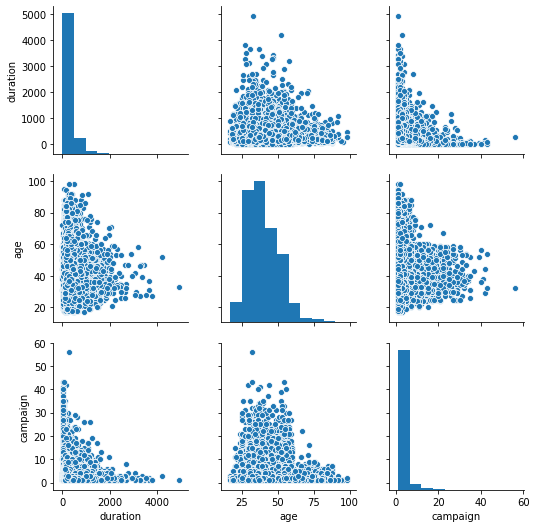

In [21]:
sns.pairplot(bank_marketing[['duration','age','campaign']])

In [22]:
bank_marketing['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

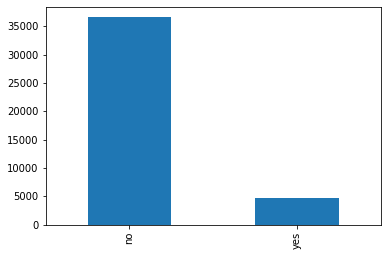

In [23]:
bank_marketing['y'].value_counts().plot.bar()

In [24]:
x =  bank_marketing.columns.drop(["y","duration"])

bank_marketing_encoded = pd.get_dummies(bank_marketing[x])

y = bank_marketing["y"]

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bank_marketing_encoded,y,train_size = 0.8, random_state = 0)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
from sklearn.metrics import classification_report

test_predictions = model.predict(x_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      7319
         yes       0.32      0.37      0.35       919

    accuracy                           0.84      8238
   macro avg       0.62      0.64      0.63      8238
weighted avg       0.85      0.84      0.85      8238



In [27]:
# evaluate using confusion matrix

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train, train_predictions)

print("Train Confusion Matrix: \n \n", train_confusion_matrix)

print("\n")
    
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print("Test Confusion Matrix: \n \n", test_confusion_matrix)

Train Confusion Matrix: 
 
 [[29222     7]
 [  163  3558]]


Test Confusion Matrix: 
 
 [[6605  714]
 [ 577  342]]


In [28]:
"""

Tuning hyperparameters to deal with overfitting

min_samples_split: the minimum number of samples required to split an internal node:
max_leaf_nodes: maximum number of leaves on tree
"""

model_hyp = DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_split=5)

model_hyp.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
test_hyp_predictions = model_hyp.predict(x_test)

print(classification_report(y_test, test_hyp_predictions))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7319
         yes       0.68      0.19      0.30       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [30]:
# evaluate using confusion matrix

train_predictions = model_hyp.predict(x_train)
test_predictions = model_hyp.predict(x_test)

from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train, train_predictions)

print("Train Confusion Matrix: \n \n", train_confusion_matrix)

print("\n")
    
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print("Test Confusion Matrix: \n \n", test_confusion_matrix)

Train Confusion Matrix: 
 
 [[28934   295]
 [ 3004   717]]


Test Confusion Matrix: 
 
 [[7235   84]
 [ 741  178]]
